<a href="https://colab.research.google.com/github/livalle/An-lise-de-Teste-ABC/blob/main/Teste_meluiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas necessarias

!pip install pandasql
import pandas as pd
import pandasql as ps

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=d25d5676d332319daa6b666fdfec4c914803b255907c3fabad68e17aa6f7b2f1
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [ ]:
#upload dos dados necessarios

clientes = pd.read_csv('/content/clientes.csv')
produtos = pd.read_csv('/content/produtos.csv')
pedidos = pd.read_csv('/content/pedidos.csv')
itens_pedido = pd.read_csv('/content/itens_pedido.csv')

In [ ]:
#resposta da pergunta 1:

query_q1 = """
SELECT
    c.grupo,
    COUNT(DISTINCT c.cliente_id) as total_clientes,
    SUM(p.valor_total) as receita_total,
    SUM(p.valor_total) / COUNT(DISTINCT c.cliente_id) as receita_por_cliente
FROM clientes c
LEFT JOIN pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.grupo
"""


resultado_q1 = ps.sqldf(query_q1, locals())
print(resultado_q1)

  grupo  total_clientes  receita_total  receita_por_cliente
0     A             413       10110723                24481
1     B             398       11070687                27815
2     C             389       10358584                26628


In [ ]:
#resposta da pergunta 2:
#uniao das tabelas e calculo das metricas

query_q2 = """
SELECT
    c.estado,
    COUNT(p.pedido_id) as qtd_pedidos,
    SUM(p.valor_total) as receita_total,
    AVG(p.valor_total) as ticket_medio
FROM clientes c
JOIN pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.estado
ORDER BY receita_total DESC
"""

analise_estado = ps.sqldf(query_q2, locals())
print(analise_estado)

   estado  qtd_pedidos  receita_total  ticket_medio
0      RR          484        1473796   3045.033058
1      MG          462        1456938   3153.545455
2      MA          431        1384391   3212.044084
3      AL          410        1359426   3315.673171
4      GO          434        1354592   3121.179724
5      TO          394        1269645   3222.449239
6      PA          406        1259798   3102.950739
7      ES          399        1253099   3140.598997
8      AP          402        1238600   3081.094527
9      AM          385        1226854   3186.633766
10     SE          391        1222707   3127.127877
11     RJ          384        1221962   3182.192708
12     MT          382        1204402   3152.884817
13     DF          365        1194352   3272.197260
14     SC          387        1167493   3016.777778
15     PR          351        1106404   3152.148148
16     SP          358        1099359   3070.835196
17     AC          334        1097683   3286.476048
18     MS   

In [20]:
#resposta da pergunta 2:
#refinamento da query utilizando granularidade:{
#devido ao tamanho da lista, optei por listar as 100 maiores cidades em vendas}

query_q3_top100 = """
SELECT
    c.estado,
    c.cidade,
    SUM(p.valor_total) as receita_total
FROM clientes c
JOIN pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.estado, c.cidade
ORDER BY receita_total DESC
LIMIT 100
"""

resultado_q3_top100 = ps.sqldf(query_q3_top100, locals())
display(resultado_q3_top100)

,estado,cidade,receita_total
0,PR,sao Paulo,394438
1,RJ,sao Paulo,389665
2,AL,sao Paulo,384136
3,SP,sao Paulo,355253
4,RN,sao Paulo,350849
...,...,...,...
95,AM,São Paulo,125051
96,RR,Rio,124998
97,SE,Sao Paulo,123545
98,CE,Sao Paulo,118690


/tmp/ipython-input-2792533176.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado_q1, x='grupo', y='receita_por_cliente', palette='viridis')
/tmp/ipython-input-2792533176.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_estados, x='estado', y='receita_total', palette='magma')


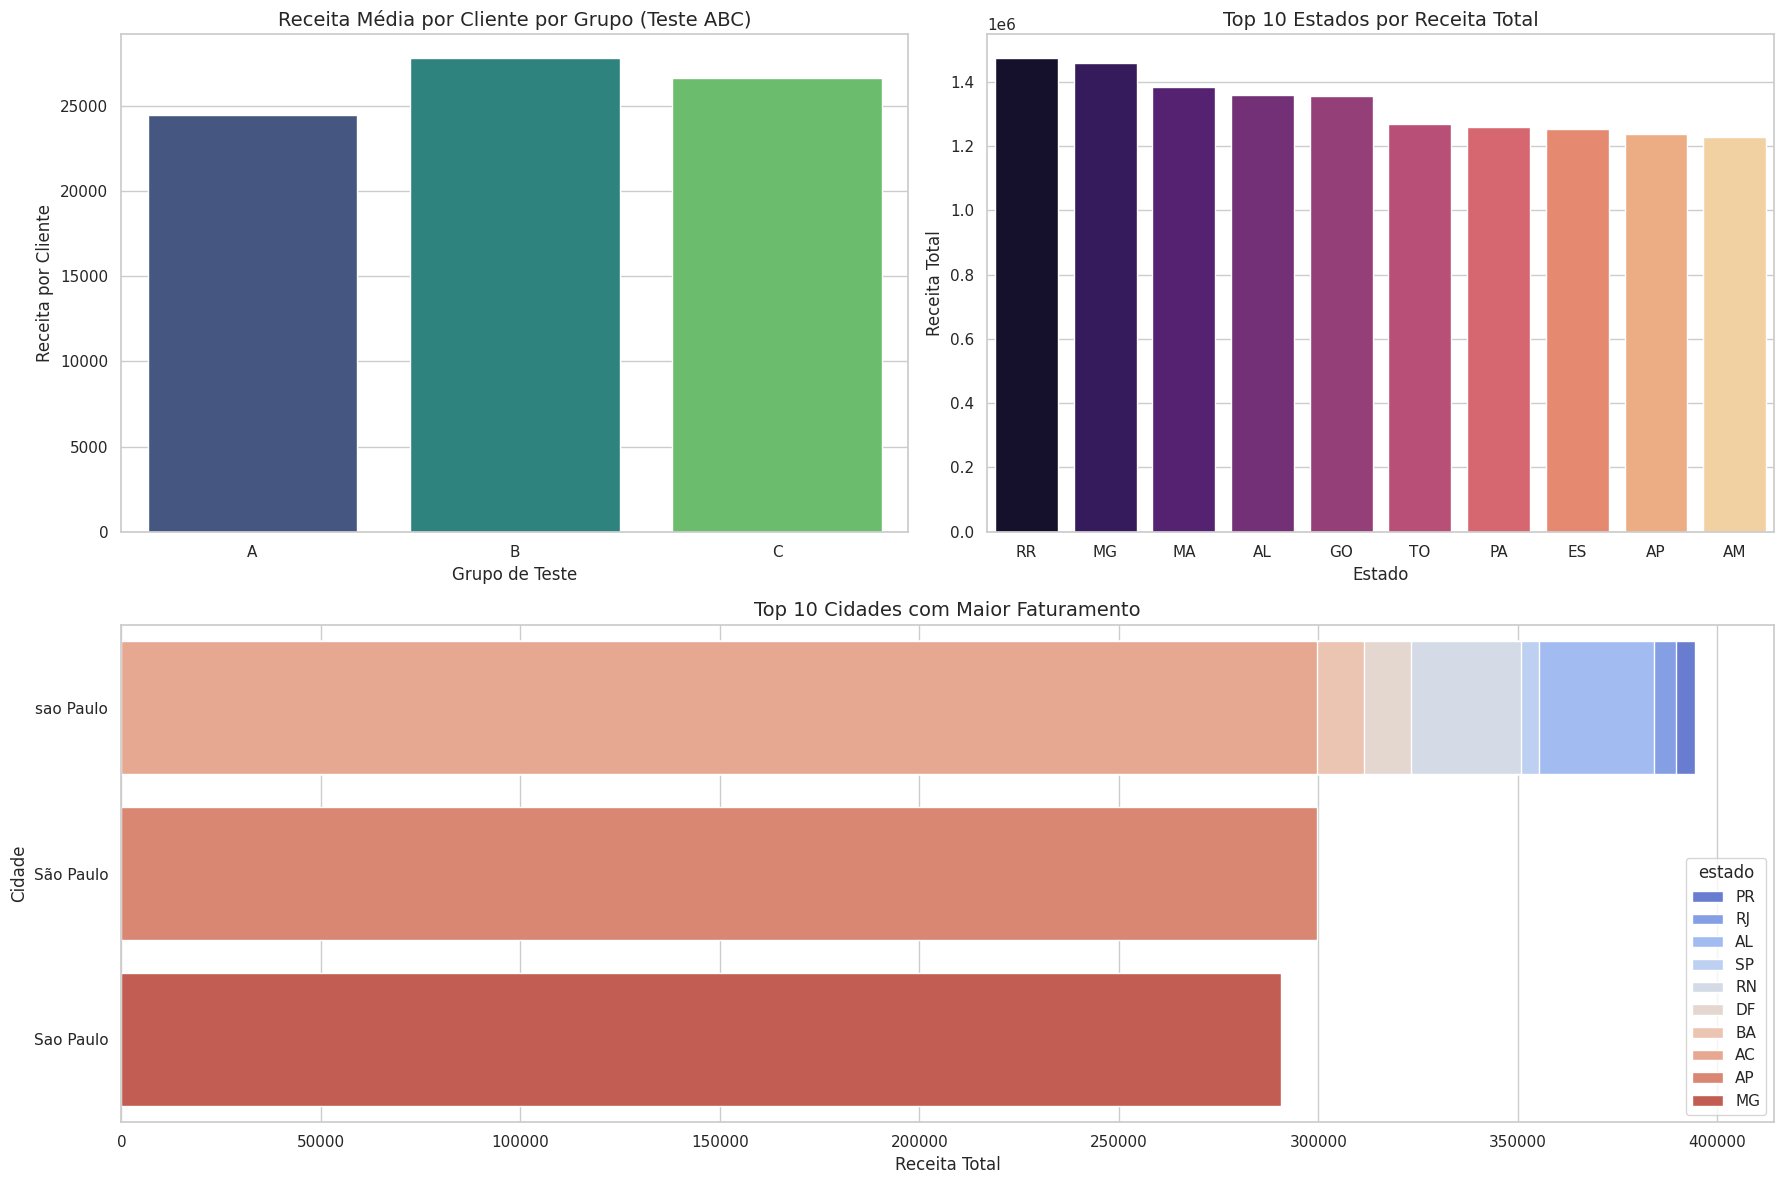

In [21]:

#visualizaca das questoes 1,2 e 3 atraves de graficos:

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18, 12))

#grafico 1: performance dos grupos (pergunta 1)
plt.subplot(2, 2, 1)
sns.barplot(data=resultado_q1, x='grupo', y='receita_por_cliente', palette='viridis')
plt.title('Receita Média por Cliente por Grupo (Teste ABC)', fontsize=14)
plt.ylabel('Receita por Cliente')
plt.xlabel('Grupo de Teste')

#grafico 2: receita total por estado (Pergunta 2)
plt.subplot(2, 2, 2)
#top 10 estados para nao poluir o grafico
top_estados = analise_estado.head(10)
sns.barplot(data=top_estados, x='estado', y='receita_total', palette='magma')
plt.title('Top 10 Estados por Receita Total', fontsize=14)
plt.ylabel('Receita Total')
plt.xlabel('Estado')

#grafico 3: top 10 cidades (Pergunta 3)
plt.subplot(2, 1, 2)
top_cidades = resultado_q3_top100.head(10)
sns.barplot(data=top_cidades, x='receita_total', y='cidade', hue='estado', dodge=False, palette='coolwarm')
plt.title('Top 10 Cidades com Maior Faturamento', fontsize=14)
plt.ylabel('Cidade')
plt.xlabel('Receita Total')

plt.tight_layout()
plt.show()

In [ ]:
#resposta da pergunta 4:
#investigacao do status do produto:

query_q4 = """
SELECT
    p.status,
    prod.categoria,
    AVG(ip.quantidade) as media_itens,
    COUNT(p.pedido_id) as total_pedidos
FROM pedidos p
JOIN itens_pedido ip ON p.pedido_id = ip.pedido_id
JOIN produtos prod ON ip.produto_id = prod.produto_id
GROUP BY p.status, prod.categoria
ORDER BY total_pedidos DESC
"""
resultado_q4 = ps.sqldf(query_q4, locals())
display(resultado_q4)

,status,categoria,media_itens,total_pedidos
0,Confirmado,Roupas,2.001434,6275
1,Confirmado,Eletrônicos,2.013613,3526
2,Confirmado,Livros,2.001939,3095
3,Confirmado,Esportes,1.992790,1803
4,CANCELADO,Roupas,1.965095,1633
5,Pending,Roupas,1.998772,1629
6,Confirmado,Brinquedos,1.976378,1524
7,Confirmado,Decoraçao,2.002128,1410
8,Confirmado,Eletronicos,2.041335,1258
9,Confirmado,Decoração,1.998369,1226


from matplotlib import pyplot as plt
_df_7['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['media_itens'].plot(kind='hist', bins=20, title='media_itens')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['total_pedidos'].plot(kind='hist', bins=20, title='total_pedidos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='index', y='media_itens', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='media_itens', y='total_pedidos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['media_itens']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('status')):
  _plot_series(series, series_name, i)
  fig.legend(title='status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('media_itens')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['total_pedidos']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('status')):
  _plot_series(series, series_name, i)
  fig.legend(title='status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('total_pedidos')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('status')):
  _plot_series(series, series_name, i)
  fig.legend(title='status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['media_itens'].plot(kind='line', figsize=(8, 4), title='media_itens')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['total_pedidos'].plot(kind='line', figsize=(8, 4), title='total_pedidos')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='media_itens', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='total_pedidos', y='status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

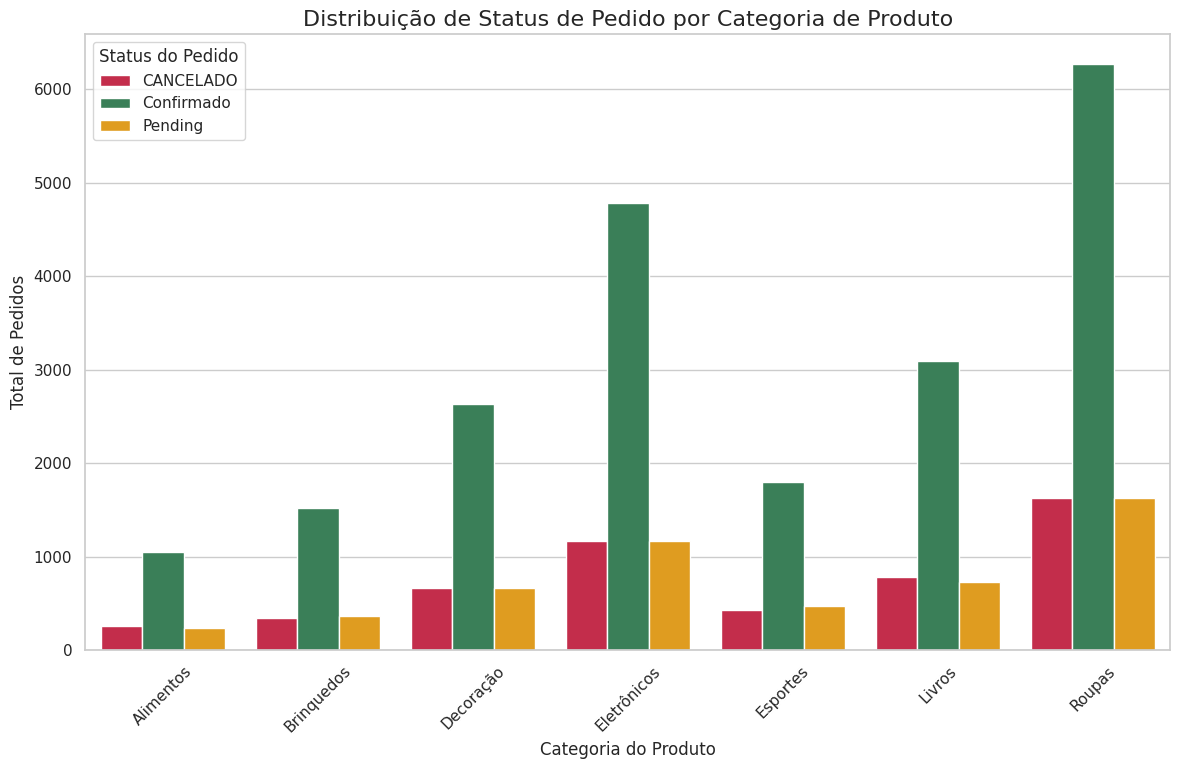

In [ ]:
#grafico 4: correlacao entre a categoria,a quantidade de itens e o status final do pedido:

import matplotlib.pyplot as plt
import seaborn as sns

#tratamento de duplicata:
resultado_q4['categoria'] = resultado_q4['categoria'].replace({
    'Eletronicos': 'Eletrônicos',
    'Decoraçao': 'Decoração'
})

#agrupamento e limpeza dos dados
df_grafico_q4 = resultado_q4.groupby(['status', 'categoria'])['total_pedidos'].sum().reset_index()

plt.figure(figsize=(14, 8))

#criacao do grafico:
sns.barplot(
    data=df_grafico_q4,
    x='categoria',
    y='total_pedidos',
    hue='status',
    palette={'Confirmado': 'seagreen', 'CANCELADO': 'crimson', 'Pending': 'orange'}
)

plt.title('Distribuição de Status de Pedido por Categoria de Produto', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Total de Pedidos', fontsize=12)
plt.legend(title='Status do Pedido')
plt.xticks(rotation=45)

plt.show()

In [ ]:
#resposta da pergunta 5:
#exploracao e calculo da taxa de conversao por grupo:

query_q5 = """
SELECT
    c.grupo,
    COUNT(DISTINCT c.cliente_id) as total_clientes,
    COUNT(DISTINCT p.cliente_id) as clientes_com_pedido,
    (CAST(COUNT(DISTINCT p.cliente_id) AS FLOAT) / COUNT(DISTINCT c.cliente_id)) * 100 as taxa_conversao_pct,
    SUM(p.valor_total) / COUNT(p.pedido_id) as ticket_medio_pedido
FROM clientes c
LEFT JOIN pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.grupo
"""

resultado_final = ps.sqldf(query_q5, locals())
display(resultado_final)

,grupo,total_clientes,clientes_com_pedido,taxa_conversao_pct,ticket_medio_pedido
0,A,413,413,100.0,2939
1,B,398,398,100.0,3388
2,C,389,389,100.0,3145


/tmp/ipython-input-2210557771.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado_q5_v2, x='grupo', y='ticket_medio_pedido', palette='plasma')


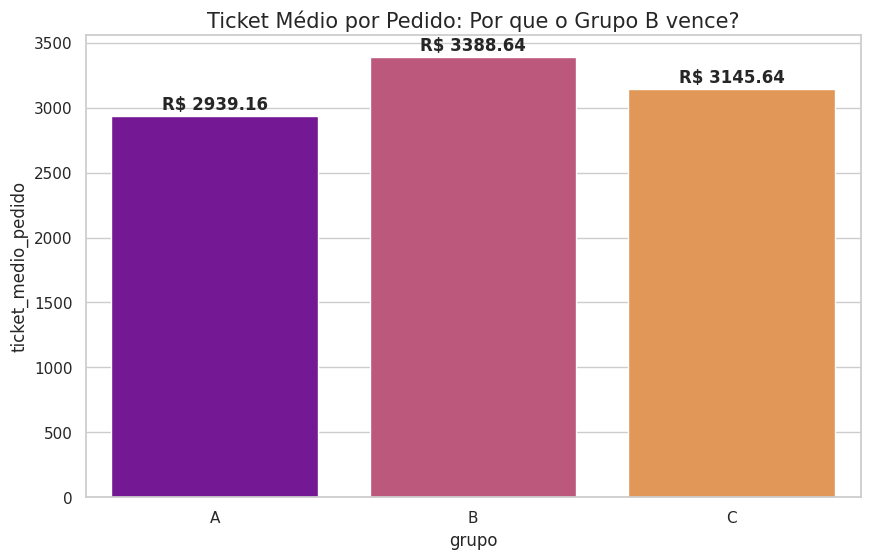

In [ ]:
#grafico 5: ticket medio por pedido

#query do ticket medio
query_q5_v2 = """
SELECT
    c.grupo,
    AVG(p.valor_total) as ticket_medio_pedido
FROM clientes c
JOIN pedidos p ON c.cliente_id = p.cliente_id
GROUP BY c.grupo
"""
resultado_q5_v2 = ps.sqldf(query_q5_v2, locals())

#criando o grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=resultado_q5_v2, x='grupo', y='ticket_medio_pedido', palette='plasma')

for i, valor in enumerate(resultado_q5_v2['ticket_medio_pedido']):
    plt.text(i, valor + 50, f'R$ {valor:.2f}', ha='center', fontweight='bold')

plt.title('Ticket Médio por Pedido: Por que o Grupo B vence?', fontsize=15)
plt.show()